In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, silhouette_score, calinski_harabasz_score, davies_bouldin_score

import warnings
import os

warnings.filterwarnings('ignore')

data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
data.shape

(200, 5)

In [28]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [29]:
# Revisión de valores nulos
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [30]:
# Cambiar datos categoricos a numericos para procesamiento
data = pd.get_dummies(data, columns=['Gender'], prefix=['gender'])
data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),gender_Female,gender_Male
0,1,19,15,39,False,True
1,2,21,15,81,False,True
2,3,20,16,6,True,False
3,4,23,16,77,True,False
4,5,31,17,40,True,False
...,...,...,...,...,...,...
195,196,35,120,79,True,False
196,197,45,126,28,True,False
197,198,32,126,74,False,True
198,199,32,137,18,False,True


## Vamos a seleccionar los datos de edad, salario anual y puntaje de gasto para el modelo

In [31]:
data = data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


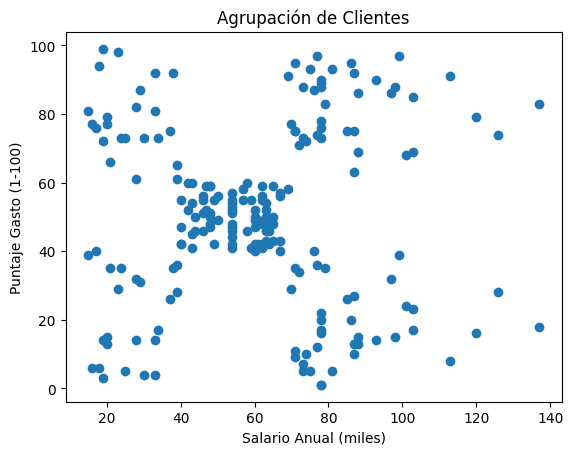

In [32]:
plt.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"])
plt.xlabel('Salario Anual (miles)')
plt.ylabel('Puntaje Gasto (1-100)')
plt.title('Agrupación de Clientes')
plt.show()

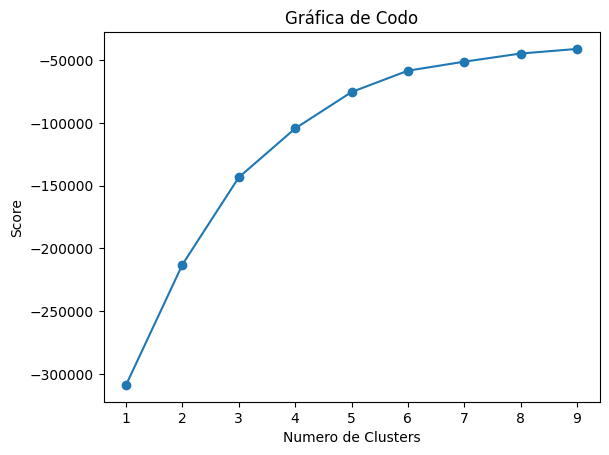

In [34]:
nc = range(1, 10) #Especifica numero de clusters
kmeans = [KMeans(n_clusters=i) for i in nc]
kmeans
score = [kmeans[i].fit(data).score(data) for i in range(len(kmeans))]
score
plt.plot(nc, score, marker='o')
plt.xlabel('Numero de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

In [35]:
model = KMeans(n_clusters=7, random_state=0)
model.fit(data)

KMeans(n_clusters=7, random_state=0)

In [36]:
model.labels_
data["Group"] = model.labels_
print(data)

     Age  Annual Income (k$)  Spending Score (1-100)  Group
0     19                  15                      39      4
1     21                  15                      81      5
2     20                  16                       6      4
3     23                  16                      77      5
4     31                  17                      40      4
..   ...                 ...                     ...    ...
195   35                 120                      79      0
196   45                 126                      28      6
197   32                 126                      74      0
198   32                 137                      18      6
199   30                 137                      83      0

[200 rows x 4 columns]


# Ahora evaluaremos el desempeño y realizaremos las gráficas y sus analisis

In [37]:
obs = len(data)
X = data.drop('Group', axis=1)
clusters = data['Group']

sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

table_data = [
    ["Numero Observaciones", obs],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

from tabulate import tabulate
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='pretty'))

+------------------------+--------------------+
|         Metric         |       Value        |
+------------------------+--------------------+
|  Numero Observaciones  |        200         |
| Coeficiente Silhouette | 0.4412807576186172 |
|    Indice Calinski     | 162.2852042279988  |
| Indice Davies Bouldin  | 0.7863764854525301 |
+------------------------+--------------------+


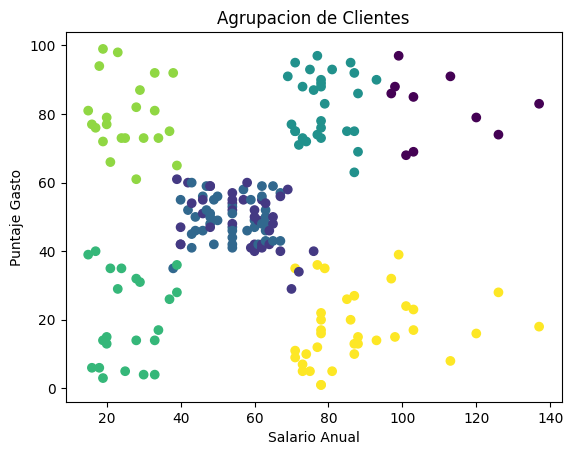

In [39]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Group'], cmap='viridis')
plt.xlabel('Salario Anual')
plt.ylabel('Puntaje Gasto')
plt.title('Agrupacion de Clientes')
plt.show()

In [40]:
import plotly.express as px
import plotly.graph_objs as go

grafica3D = px.scatter_3d(data, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age', color='Group', symbol='Group', symbol_map={0: 'circle', 1: 'circle', 2: 'circle', 3: 'circle', 4: 'circle', 5: 'circle', 6: 'circle'})
grafica3D.update_layout(showlegend=False)

## Interpretación de los Resultados
- En la primera gráfica se puede observar la división en grupos (7 grupos según lo expuesto por la gráfica de codo) de el conjunto de clientes, se puede observar un aparente solapamiento de los grupos o clusters, que luego se observa que no es un solapamiento al transformar la gráfica a 3D junto a la variable de la edad.

- Coeficiente de Silhoutte: La puntuación de Silhoutte de 0.44 indica que los clusters estan moderadamiente bien separados
- Índice Calinski: Puntuación de 162 indica clusters relativamente bien definidos. Cómo se ve [aquí](https://stats.stackexchange.com/questions/52838/what-is-an-acceptable-value-of-the-calinski-harabasz-ch-criterion)
- Índice Davies Bouldin: Puntuación de 0.78 que indica que puede existir cierto solapamiento, tal como se vio en 2D.

- Se observa una gran cantidad de personas que independientemente de la edad, se ubica en un rango de 40 a 80 mil dolares de salario anual, lo cual para marketing sería la población objetivo de campañas de publicidad

- Se puede observar que las personas con mayor salario y puntaje de gasto no son personas de la tercera edad.


# Clustering Jerarquico

In [41]:
from sklearn.cluster import AgglomerativeClustering as aggclus
from scipy.cluster.hierarchy import dendrogram, linkage

data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [42]:
data.shape

(200, 5)

In [43]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [44]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

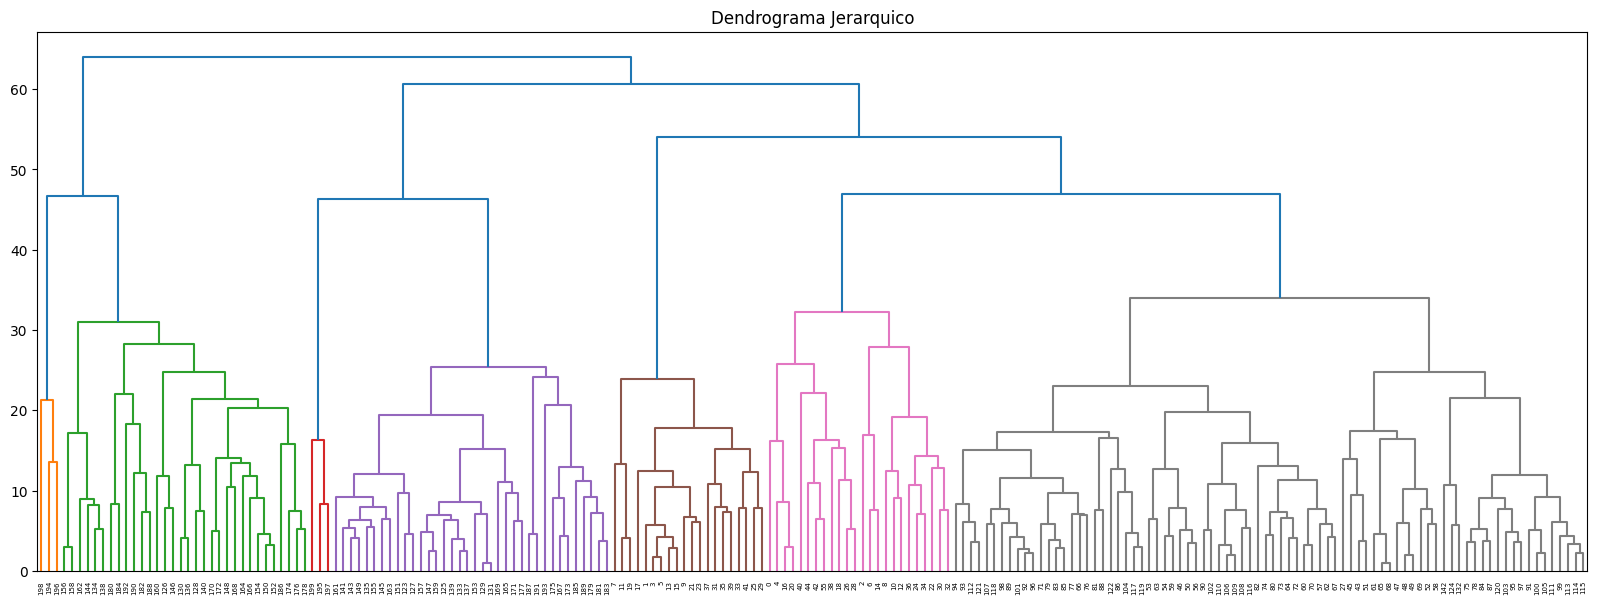

In [46]:
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

linked = linkage(X, 'average')

plt.figure(figsize=(20, 7))
dendrogram(linked)
plt.title('Dendrograma Jerarquico')
plt.show()

In [53]:
clustering = aggclus(n_clusters=7, linkage='average') #Agrupar en 7 grupos
clustering.fit(X)

obs = len(data)

data['Group'] = clustering.labels_
clusters = data['Group']

sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

metric_data = [
    ["Numero Observaciones", obs],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

print(tabulate(metric_data, headers=['Metric', 'Value'], tablefmt='pretty'))

+------------------------+--------------------+
|         Metric         |       Value        |
+------------------------+--------------------+
|  Numero Observaciones  |        200         |
| Coeficiente Silhouette | 0.4102108627180583 |
|    Indice Calinski     | 117.47646940531598 |
| Indice Davies Bouldin  | 0.7540843374118072 |
+------------------------+--------------------+


## Analisis y Resultados

- El dendrograma nos representa la disposición de los cluster que se agrupan por jerarquias. Observando el dendrograma, y luego de unas pruebas con las métricas, observamos que un número adecuado de clusters es 7 (igual que en k-means)

- Coeficiente de Silhoutte: La puntuación de Silhoutte de 0.41 indica que los clusters estan moderadamiente bien separados.

- Índice Calinski: Puntuación de 117 indica clusters relativamente bien definidos aunque pierde puntaje respecto a k-means.

- Índice Davies Bouldin: Puntuación de 0.75 que indica que puede existir un solapamiento en los clusters.

- Podemos concluir que el método o modelo de k-means parece ser más adecuado para tratar datos de este tipo de datasets, esto respaldado por las métricas y coeficientes resultantes.

